In [1]:
#!/home/lilly.thein/.conda/envs/openmc-env/bin/python

import openmc
import numpy as np
import matplotlib.pyplot as plt
import openmc.cell
import openmc.universe

In [2]:
##### MATERIAIS ################
# AGUA DESMINERALIZADA
water = openmc.Material(name='Water')
water.set_density('g/cm3', 1.0)
water.add_nuclide('H1', 2.0, 'ao')
water.add_nuclide('O16', 1.0, 'ao')
# COMBUSTÍVEL                                                        TIPO AL B(*6)
ual_b = openmc.Material(name='UZrHAL Ring B')
ual_b.set_density('g/cm3', 6.8982)
ual_b.add_element('U',  0.03,'ao', enrichment= 19.809)
ual_b.add_element('H',  1.0, 'ao')
ual_b.add_element('Zr', 1.0, 'ao')
# COMBUSTÍVEL                                                        TIPO AL C(*12)
ual_c = openmc.Material(name='UZrHAL Ring C')
ual_c.set_density('g/cm3', 6.9046)
ual_c.add_element('U',  0.03,'ao', enrichment= 19.799)
ual_c.add_element('H',  1.0, 'ao')
ual_c.add_element('Zr', 1.0, 'ao')
# COMBUSTÍVEL                                                        TIPO AL D(*16)
ual_d = openmc.Material(name='UZrHAL Ring D')
ual_d.set_density('g/cm3', 6.4958)
ual_d.add_element('U',  0.03,'ao', enrichment= 19.810)
ual_d.add_element('H',  1.0, 'ao')
ual_d.add_element('Zr', 1.0, 'ao')
# COMBUSTÍVEL                                                        TIPO AL E(*22)
ual_e = openmc.Material(name='UZrHAL Ring E')
ual_e.set_density('g/cm3', 6.8719)
ual_e.add_element('U',  0.03,'ao', enrichment= 19.810)
ual_e.add_element('H',  1.0, 'ao')
ual_e.add_element('Zr', 1.0, 'ao')
# GRAFITA
graphite = openmc.Material(name='Graphite')
graphite.set_density('g/cm3', 1.67)
graphite.add_element('C', 1.0)
graphite.add_s_alpha_beta('c_Graphite')
# Stainless steel AISI-304
ss304 = openmc.Material(name='Stainless Steel 304')
ss304.set_density('g/cm3', 8.0)
ss304.add_element('Fe',.6684,'wo')
ss304.add_element('Cr',.19,'wo')
ss304.add_element('Ni',.1,'wo')
ss304.add_element('Mn',.02,'wo')
ss304.add_element('Si',.02,'wo')
ss304.add_element('C',.0008,'wo')
ss304.add_element('P',.0004,'wo')
ss304.add_element('S',.0004,'wo')
#ZIRCONIO
zirconium = openmc.Material(name='Zirconium')
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.490)
# ALUMINIO AL 1100-F
aluminum = openmc.Material(name='Aluminum')
aluminum.add_element('Al', 1.0)
aluminum.set_density('g/cm3', 2.70)
# CARBETO DE BORO
b4c = openmc.Material(name='Boron Carbide')
b4c.set_density('g/cm3', 2.51)
b4c.add_nuclide('B11', 4.0, 'ao')
b4c.add_nuclide('C12', 1.0, 'ao')
#SAMARIO
samario = openmc.Material(name='Samario')
samario.set_density('g/cm3', 2.70)
samario.add_nuclide('Sm152', 0.00267, 'wo')
samario.add_nuclide('Sm150', 0.00074, 'wo')
samario.add_nuclide('Sm149', 0.00138, 'wo')
samario.add_nuclide('Sm147', 0.0015, 'wo')
samario.add_nuclide('O16', 0.00371, 'wo')
samario.add_nuclide('Al27', 0.99, 'wo')
#AR
ar = openmc.Material(name='Ar')
ar.set_density('g/cm3', 0.0013)
ar.add_nuclide('O16', 0.2221, 'wo')
ar.add_nuclide('N14', 0.7779, 'wo')
#############
# COMBUSTÍVEL                                                        TIPO INOX (0 NO NUC ORIGINAL) !!!!!!!!!!!!!!!!!
uinox= openmc.Material(name='UZrHINOX')
uinox.set_density('g/cm3', 6.3099)
uinox.add_element('U',   0.04, 'ao', enrichment=20.0)
uinox.add_element('H',  1.6, 'ao')
uinox.add_element('Zr', 1.0, 'ao')

materials_file = openmc.Materials([water, ual_b, ual_c, ual_d, ual_e, graphite, ss304, zirconium, aluminum, b4c, samario, ar, uinox])
materials_file.export_to_xml()

/home/lilly.thein/.conda/envs/openmc-env/lib/python3.12/site-packages/openmc/material.py:787: UserWarning: A uranium enrichment of 19.809 was given for Material ID="2". OpenMC assumes the U234/U235 mass ratio is constant at 0.008, which is only valid at low enrichments. Consider setting the isotopic composition manually for enrichments over 5%.
  warnings.warn(msg)
/home/lilly.thein/.conda/envs/openmc-env/lib/python3.12/site-packages/openmc/material.py:787: UserWarning: A uranium enrichment of 19.799 was given for Material ID="3". OpenMC assumes the U234/U235 mass ratio is constant at 0.008, which is only valid at low enrichments. Consider setting the isotopic composition manually for enrichments over 5%.
  warnings.warn(msg)
/home/lilly.thein/.conda/envs/openmc-env/lib/python3.12/site-packages/openmc/material.py:787: UserWarning: A uranium enrichment of 19.81 was given for Material ID="4". OpenMC assumes the U234/U235 mass ratio is constant at 0.008, which is only valid at low enrichm

In [3]:
# PLACAS #
####################################
# PLACA SUPERIOR #
psup_r = openmc.ZCylinder(r = 22.06)   #
psup_max = openmc.ZPlane(z0 = -4.22)
psup_min = openmc.ZPlane(z0 = -6.12)

placasuperior_cell = openmc.Cell(name = 'Placa Superior')
placasuperior_cell.fill = aluminum
placasuperior_cell.region = -psup_r & +psup_min & -psup_max
####################################
# PLACA INFERIOR #
pinf_r = openmc.ZCylinder(r = 22.06)   #
pinf_max = openmc.ZPlane(z0 = -70.92)
pinf_min = openmc.ZPlane(z0 = -72.82)

placainferior_cell = openmc.Cell(name = 'Placa Inferior')
placainferior_cell.fill = aluminum
placainferior_cell.region = -pinf_r & +pinf_min & -pinf_max

placas_un = openmc.Universe(name = 'Universo Placas')
placas_un.add_cell(placainferior_cell)
placas_un.add_cell(placasuperior_cell)


#placas_un.plot(width=(50, 80), origin=[0,0,-40], basis='yz', color_by='material')

In [4]:
#### GEOMETRIA #####################

### ELEMENTO COMBUSTIVEL ALUMINIO
ual_cell_outer_radius = openmc.ZCylinder(r=1.780)
graphite_outer_radius = ual_cell_outer_radius
samario_outer_radius = ual_cell_outer_radius
clad_outer_radius = openmc.ZCylinder(r=1.865)       # espessura= 0.076, 0.009 é gap
clad_inner_radius = openmc.ZCylinder(r= 1.789)

ual_cell_top = openmc.ZPlane(z0= -19.53)
ual_cell_bot = openmc.ZPlane(z0=-55.09)         

graphite_upper_top = openmc.ZPlane(z0= -9.24)
graphite_upper_bot = openmc.ZPlane(z0= -19.4)
graphite_lower_top = openmc.ZPlane(z0=-55.22)
graphite_lower_bot = openmc.ZPlane(z0=-65.38)

samario_upper_top = openmc.ZPlane(z0=-19.4)
samario_upper_bot = openmc.ZPlane(z0=-19.53)
samario_lower_top = openmc.ZPlane(z0=-55.09)
samario_lower_bot = openmc.ZPlane(z0=-55.22)

clad_top = openmc.ZPlane(z0=-9.24)
clad_bot = openmc.ZPlane(z0=-65.38)
#disco de aluminio em cima em embaixo?

# terminais / parafusos
parafsup_top = openmc.ZPlane(z0 = 0.0)
parafsup_bot = openmc.ZPlane(z0 = -4.22)
parafsup_r = openmc.ZCylinder(r= 1.57)
parafinf_top = openmc.ZPlane(z0 = -65.38)
parafinf_bot = openmc.ZPlane(z0=-70.92)
parafinf_r = openmc.ZCylinder(r=1.57)
# espaçador triangular (aproximar para cilindro? extender parafuso superior?)
espal_radius = openmc.ZCylinder(r= 1.500)
espal_top = openmc.ZPlane(z0=-6.12)
espal_bot = openmc.ZPlane(z0=-9.24)
####################################
####################################
# CELULAS COMUNS A TODOS OS ANEIS
# refletor axial de grafite superior
graphite_upper_cell = openmc.Cell(name='Upper Graphite')
graphite_upper_cell.fill = graphite
graphite_upper_cell.region = -graphite_outer_radius & -graphite_upper_top & +graphite_upper_bot
# refletor axial de grafite inferior
graphite_lower_cell = openmc.Cell(name='Lower Graphite')
graphite_lower_cell.fill = graphite
graphite_lower_cell.region = -graphite_outer_radius & -graphite_lower_top & +graphite_lower_bot
# Disco superior samario
samario_upper_cell = openmc.Cell(name='Upper Samario')
samario_upper_cell.fill = samario
samario_upper_cell.region = -samario_outer_radius & -samario_upper_top & +samario_upper_bot
# Disco inferior samario
samario_lower_cell = openmc.Cell(name='Lower Samario')
samario_lower_cell.fill = samario
samario_lower_cell.region = -samario_outer_radius & -samario_lower_top & +samario_lower_bot
# Parafuso superior
parafsup_cell = openmc.Cell(name='Parafuso Superior')
parafsup_cell.fill = aluminum
parafsup_cell.region = -parafsup_r & -parafsup_top & +parafsup_bot
# Parafuso inferior
parafinf_cell = openmc.Cell(name = 'Parafuso Inferior')
parafinf_cell.fill = aluminum
parafinf_cell.region = -parafinf_r & -parafinf_top & +parafinf_bot
# Revestimento de Alumínio
cladal_cell = openmc.Cell(name='Revestimento de Alumínio')
cladal_cell.fill = aluminum
cladal_cell.region = -clad_outer_radius & +clad_inner_radius &  -clad_top & +clad_bot
# Gap de ar
gap_cell = openmc.Cell(name='Gap')
gap_cell.fill = ar
gap_cell.region = -clad_inner_radius & +ual_cell_outer_radius & -ual_cell_top & +ual_cell_bot
# Espaçador Triangular
espal_cell = openmc.Cell(name='Espaçador Triangular')
espal_cell.fill = aluminum
espal_cell.region = -espal_radius & -espal_top & +espal_bot
#############################################
#############################################
# UNIVERSO ELEMENTO COMBUSTÍVEL B DE ALUMINIO
alb_un = openmc.Universe(name='UZrHAL B Fuel Universe')
# vareta combustivel b aluminio
ual_b_cell= openmc.Cell(name='UZrHAL B')
ual_b_cell.fill = ual_b
ual_b_cell.region = -ual_cell_outer_radius & -ual_cell_top & +ual_cell_bot
alb_un.add_cell(ual_b_cell)

alb_un.add_cell(graphite_upper_cell)
alb_un.add_cell(graphite_lower_cell)
alb_un.add_cell(samario_upper_cell)
alb_un.add_cell(samario_lower_cell)
alb_un.add_cell(parafsup_cell)
alb_un.add_cell(parafinf_cell)
alb_un.add_cell(cladal_cell)
alb_un.add_cell(gap_cell)
alb_un.add_cell(espal_cell)
#############################################
# UNIVERSO ELEMENTO COMBUSTÍVEL C DE ALUMINIO
alc_un = openmc.Universe(name='UZrHAL C Fuel Universe')
# vareta combustivel c aluminio
ual_c_cell= openmc.Cell(name='UZrHAL C')
ual_c_cell.fill = ual_c
ual_c_cell.region = -ual_cell_outer_radius & -ual_cell_top & +ual_cell_bot
alc_un.add_cell(ual_c_cell)

alc_un.add_cell(graphite_upper_cell)
alc_un.add_cell(graphite_lower_cell)
alc_un.add_cell(samario_upper_cell)
alc_un.add_cell(samario_lower_cell)
alc_un.add_cell(parafsup_cell)
alc_un.add_cell(parafinf_cell)
alc_un.add_cell(cladal_cell)
alc_un.add_cell(gap_cell)
alc_un.add_cell(espal_cell)
#############################################
# UNIVERSO ELEMENTO COMBUSTÍVEL D DE ALUMINIO
ald_un = openmc.Universe(name='UZrHAL D Fuel Universe')
# vareta combustivel d aluminio
ual_d_cell= openmc.Cell(name='UZrHAL D')
ual_d_cell.fill = ual_d
ual_d_cell.region = -ual_cell_outer_radius & -ual_cell_top & +ual_cell_bot
ald_un.add_cell(ual_d_cell)

ald_un.add_cell(graphite_upper_cell)
ald_un.add_cell(graphite_lower_cell)
ald_un.add_cell(samario_upper_cell)
ald_un.add_cell(samario_lower_cell)
ald_un.add_cell(parafsup_cell)
ald_un.add_cell(parafinf_cell)
ald_un.add_cell(cladal_cell)
ald_un.add_cell(gap_cell)
ald_un.add_cell(espal_cell)
#############################################
# UNIVERSO ELEMENTO COMBUSTÍVEL E DE ALUMINIO
ale_un = openmc.Universe(name='UZrHAL E Fuel Universe')
# vareta combustivel e aluminio
ual_e_cell= openmc.Cell(name='UZrHAL E')
ual_e_cell.fill = ual_e
ual_e_cell.region = -ual_cell_outer_radius & -ual_cell_top & +ual_cell_bot
ale_un.add_cell(ual_e_cell)

ale_un.add_cell(graphite_upper_cell)
ale_un.add_cell(graphite_lower_cell)
ale_un.add_cell(samario_upper_cell)
ale_un.add_cell(samario_lower_cell)
ale_un.add_cell(parafsup_cell)
ale_un.add_cell(parafinf_cell)
ale_un.add_cell(cladal_cell)
ale_un.add_cell(gap_cell)
ale_un.add_cell(espal_cell)
#############################################

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

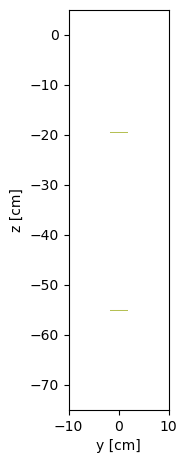

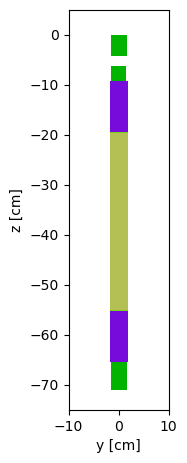

In [18]:
# teste samario
testesamario = openmc.Universe(name='teste samario')

testesamario.add_cell(samario_lower_cell)
testesamario.add_cell(samario_upper_cell)
testesamario.plot(width=(20, 80), origin=[0,0,-35], basis='yz', color_by='material')


ale_un.plot(width=(20, 80), origin=[0,0,-35], basis='yz', color_by='material')

#############################################
#############################################

In [6]:
# UNIVERSO ELEMENTO DE GRAFITA
graf_un = openmc.Universe(name='Graphite Universe')
# vareta de grafita
graf_cell= openmc.Cell(name='Elemento Grafita')
graf_cell.fill = graphite
graf_cell.region = -ual_cell_outer_radius & -ual_cell_top & +ual_cell_bot
graf_un.add_cell(graf_cell)

graf_un.add_cell(graphite_upper_cell)
graf_un.add_cell(graphite_lower_cell)
graf_un.add_cell(samario_upper_cell)
graf_un.add_cell(samario_lower_cell)
graf_un.add_cell(parafsup_cell)
graf_un.add_cell(parafinf_cell)
graf_un.add_cell(cladal_cell)
graf_un.add_cell(gap_cell)
graf_un.add_cell(espal_cell)
#############################################

In [7]:
# BARRAS DE CONTROLE
ar_outer_radius = openmc.ZCylinder(r=3.33)     #
b4c_outer_radius = openmc.ZCylinder(r=0.111)
clad_outer_radius = openmc.ZCylinder(r=1.11)
raio_exttuboguia = openmc.ZCylinder(r = 0.19)
raio_inttuboguia = openmc.ZCylinder(r = 0.16)

rod_min = openmc.ZPlane(z0=0.0)    #
rod_max = openmc.ZPlane(z0=51.0)   #
ar_min = openmc.ZPlane(z0=-58.42)  #
ar_max = openmc.ZPlane(z0=-57.785) #
b4c_min = openmc.ZPlane(z0=-56.515)#
b4c_max = openmc.ZPlane(z0=-18.415)#
clad_min = openmc.ZPlane(z0=-114.3)#
clad_max = openmc.ZPlane(z0=0.0)   #  
## barra de controle
raio_externorevestimento = openmc.ZCylinder(r = 1.11)
raio_internorevestimento = openmc.ZCylinder(r= 0.965)
raio_absorvedor = openmc.ZCylinder(r= 0.95)

comprimento_utilcontrole = openmc.ZPlane(z0 = 38.0)
#############################################
# UNIVERSO BARRA DE CONTROLE
control_universe = openmc.Universe(name='Universo Barra de Controle')
# Gap
ar_cell = openmc.Cell(name= 'ar')
ar_cell.fill = ar
ar_cell.region = -ar_outer_radius & -ar_min & +ar_max
control_universe.add_cell(ar_cell)
# Tubo guia
tuboguia = openmc.Cell(name='Tubo Guia')
tuboguia.fill= aluminum
tuboguia.region= -raio_exttuboguia & +raio_inttuboguia
control_universe.add_cell(tuboguia)
# Absorvedor BC4
b4c_cell = openmc.Cell(name='B4C cell')
b4c_cell.fill = b4c
b4c_cell.region = -b4c_outer_radius & -b4c_min & +b4c_max
control_universe.add_cell(b4c_cell) 
# Revestimento
revestimento_controle = openmc.Cell(name='Revestimento Barra de Controle')
revestimento_controle.fill = aluminum
revestimento_controle.region = -raio_externorevestimento & +raio_internorevestimento 
control_universe.add_cell(revestimento_controle)
#############################################
#############################################
# BARRA DE SEGURANÇA
ar_s_outer_radius = openmc.ZCylinder(r=3.33)#
b4c_s_outer_radius = openmc.ZCylinder(r=0.111)
clad_s_outer_radius = openmc.ZCylinder(r=1.11)
raio_s_exttuboguia = openmc.ZCylinder(r = 0.19)
raio_s_inttuboguia = openmc.ZCylinder(r = 0.16)

rod_s_min = openmc.ZPlane(z0=0.0)    #
rod_s_max = openmc.ZPlane(z0=51.0)   #
ar_s_min = openmc.ZPlane(z0=-58.42)  #
ar_s_max = openmc.ZPlane(z0=-57.78) #
b4c_s_min = openmc.ZPlane(z0=-56.55)#
b4c_s_max = openmc.ZPlane(z0=-18.45)#
clad_s_min = openmc.ZPlane(z0=-114.3)#
clad_s_max = openmc.ZPlane(z0=0.0)   #  
## barra de segurança
r_segrev = openmc.ZCylinder(r = 1.11)
r_segrevi= openmc.ZCylinder(r= 0.965)
raio_s_absorvedor = openmc.ZCylinder(r= 0.95)

comprimento_s_utilcontrole = openmc.ZPlane(z0 = 38.0)
#############################################
# UNIVERSO BARRA DE SEGURANÇA
seg_universe = openmc.Universe(name='Universo Barra de Segurança')
# Gap
ar_cell_s = openmc.Cell(name= 'ar s')
ar_cell_s.fill = ar
ar_cell_s.region = -ar_outer_radius & -ar_min & +ar_max
control_universe.add_cell(ar_cell)
# Tubo guia
tuboguia = openmc.Cell(name='Tubo Guia')
tuboguia.fill= aluminum
tuboguia.region= -raio_exttuboguia & +raio_inttuboguia
seg_universe.add_cell(tuboguia)
# Absorvedor BC4
b4c_cell = openmc.Cell(name='B4C cell')
b4c_cell.fill = b4c
b4c_cell.region = -b4c_outer_radius & -b4c_min & +b4c_max
seg_universe.add_cell(b4c_cell) 
# Revestimento
revestimento_seg = openmc.Cell(name='Revestimento Barra de Segurança')
revestimento_seg.fill = aluminum
revestimento_seg_region = -r_segrev & +r_segrevi
seg_universe.add_cell(revestimento_seg)
#############################################
#############################################

In [8]:
#############################################
#############################################
# TUBO CENTRAL
                                                                       # COMPRIMENTO 6100 MM DESDE TOPO DO REATOR ATE 190MM ABAIXO DA PLACA INFERIOR
tc_min = openmc.ZPlane(z0 = -1.90)
tc_max = openmc.ZPlane(z0 = 610.0)
ri_tc = openmc.ZCylinder(r= 1.69)
re_tc = openmc.ZCylinder(r=1.905)
#############################################
# UNIVERSO TUBO CENTRAL
tc_universe = openmc.Universe(name = 'Universo Tubo Central')
# revestimento do tubo
rev_tc = openmc.Cell(name = 'Revestimento Tubo Central')
rev_tc.fill = aluminum
rev_tc.region = +ri_tc & -re_tc & -tc_min & +tc_max
tc_universe.add_cell(rev_tc)
# ar dentro do tubo
tubocentral = openmc.Cell(name = 'Tubo Central')
tubocentral.fill = ar
tubocentral.region = -ri_tc & -tc_min & +tc_max
tc_universe.add_cell(tubocentral)
                                                                        # GRADE SUPERIOR 495 MM DE DIAMETRO E 19 MM DE ESPESSURA 
                                                                        # GRADE INFERIOR 40,7 CM DIAMETRO 19MM DE ESPESSURA
#############################################
#############################################

In [9]:
#############################################
#############################################
# TERMINAL PNEUMATICO 1
tp1_min = openmc.ZPlane(z0 = -1.90)
tp1_max = openmc.ZPlane(z0 = 10)
ri_tp1 = openmc.ZCylinder(r= 1.69)
re_tp1 = openmc.ZCylinder(r=1.59)
#############################################
# UNIVERSO TERMINAL PNEUMATICO 1
tp1_universe = openmc.Universe(name = 'Universo Terminal Pneumático 1')
# revestimento do tubo
rev_tp1 = openmc.Cell(name = 'Revestimento Terminal Pneumático 1')
rev_tp1.fill = aluminum
rev_tp1.region = +ri_tp1 & -re_tp1 & -tc_min & +tp1_max
tp1_universe.add_cell(rev_tp1)
# ar dentro do tubo
tp1 = openmc.Cell(name = 'Terminal Pneumático 1')
tp1.fill = ar
tp1.region = -ri_tp1 & -tp1_min & +tp1_max
tp1_universe.add_cell(tp1)
#############################################
#############################################

In [10]:
#############################################
#############################################
# Fonte de Neutrons




#############################################
#############################################

In [11]:
#############################################
#############################################
# REFLETOR 
ri_ref = openmc.ZCylinder(r = 22.85)
re_ref = openmc.ZCylinder(r = 53.35)
rev_ref = openmc.ZCylinder(r = 1.15) #
refletorint = openmc.ZCylinder(r= 22.85)
refletorext = openmc.ZCylinder(r = 53.35)
#############################################
# Radial
refletor = openmc.Cell(name='Refletor Radial de Grafita')
refletor.fill = graphite
refletor.region = +refletorint & - refletorext
#############################################
#############################################

In [12]:
# do exemplo de reator tripo triga na documentação openmc (!!)

# Célula de água ao redor do lattice
all_water_cell = openmc.Cell(fill=water)
outer_universe = openmc.Universe(cells=(all_water_cell,))

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

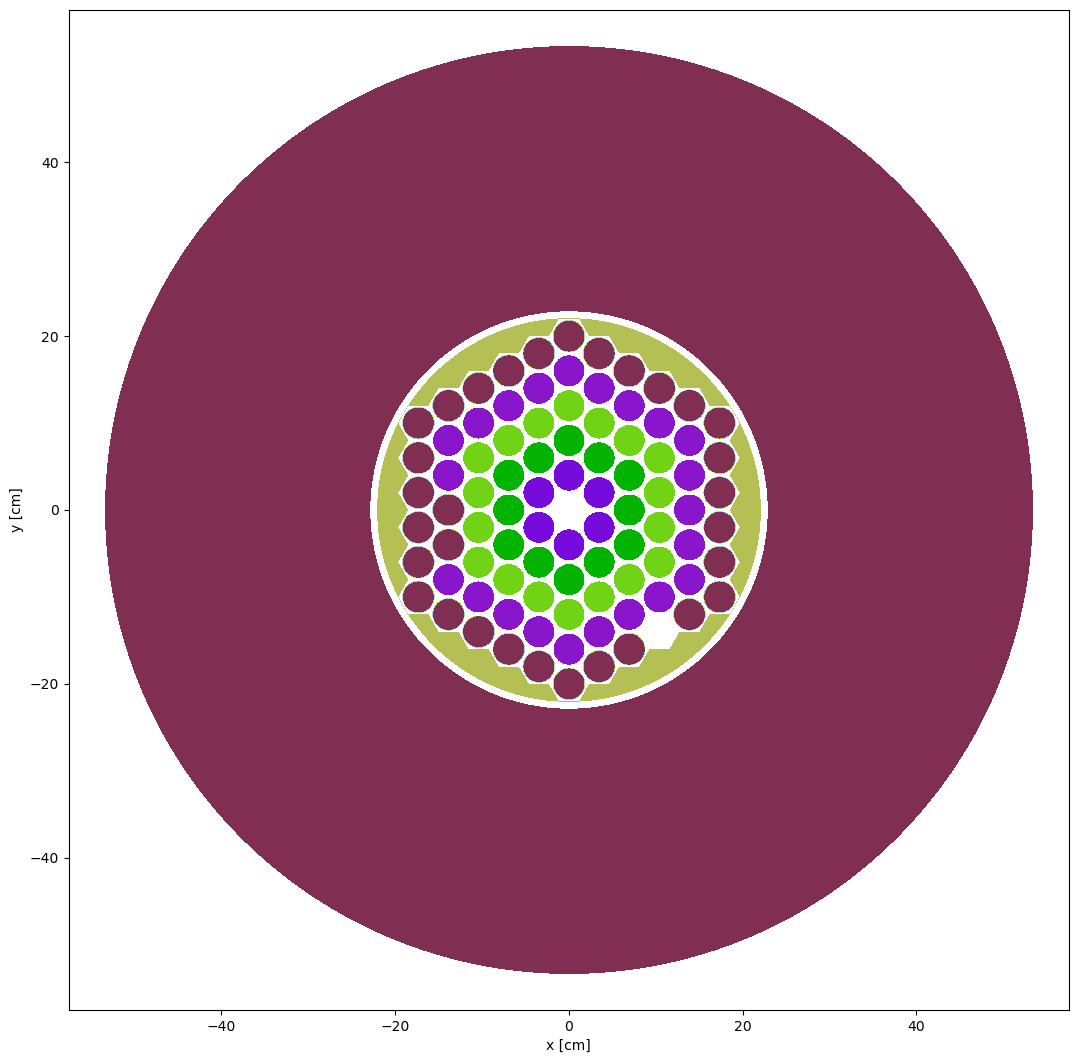

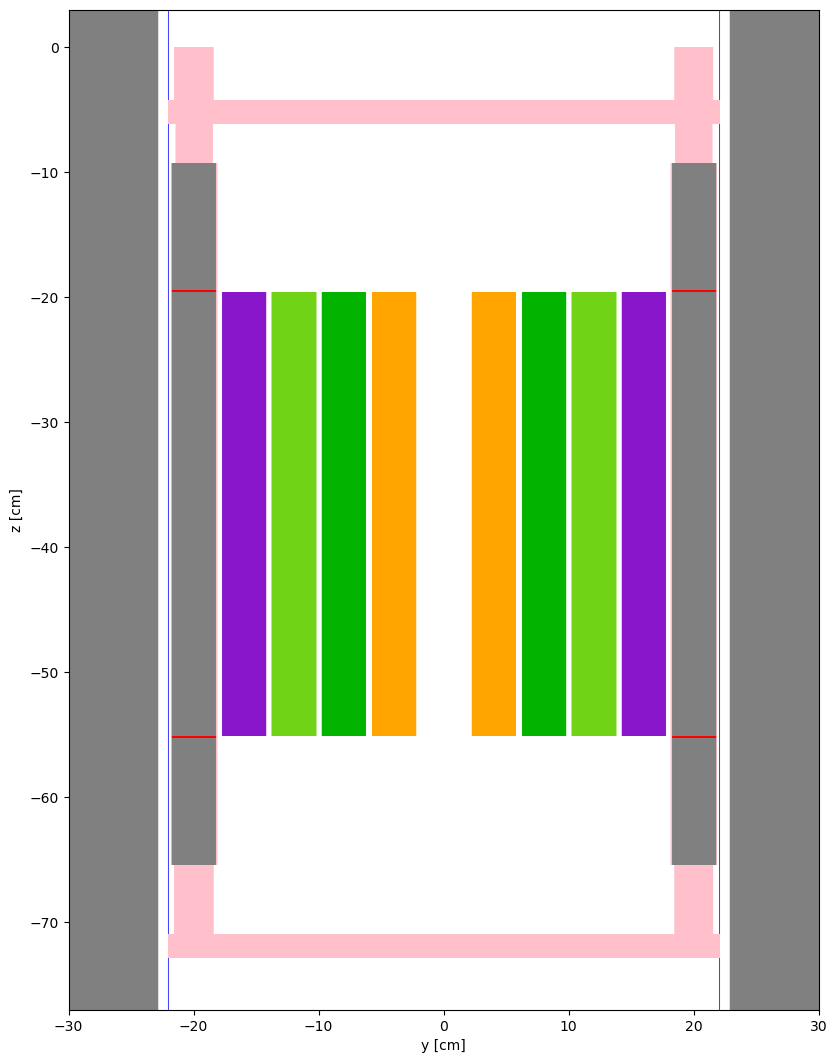

In [22]:
#############################################
#############################################
# ARRANJO LATTICE HEXAGONAL
lattice = openmc.HexLattice()
lattice.center = (0.0 ,0.0)
lattice.pitch = (4.0,)             ##########
lattice.outer = outer_universe
#############################################
F = [graf_un]*12 + [tp1_universe] +[graf_un]*17
E = [ale_un]*17 + [graf_un]*2 + [ale_un]*5
D = [ald_un]*18
C = [alc_un]*12
B = [alb_un]*6
A = [tc_universe]
#############################################
#print(lattice.show_indices(num_rings=6))
lattice.universes = [F, E, D, C, B, A]
raionucleo = openmc.ZCylinder(r=22.06, boundary_type='vacuum')
nucleo_cell = openmc.Cell(fill=lattice, region=-raionucleo)
#############################################
#############################################
# UNIVERSO DO REATOR
reator_un = openmc.Universe(name='Reator')
reator_un.add_cell(nucleo_cell)
reator_un.add_cell(refletor)
reator_un.add_cell(placasuperior_cell)
reator_un.add_cell(placainferior_cell)

geometry = openmc.Geometry([nucleo_cell])
geometry.export_to_xml()

reator_un.plot(width=(115, 115), origin=[0,0,-30], basis='xy', color_by='material',  pixels=[1000,1000])
reator_un.plot(width=(60, 80), origin=[0,0,-37], basis='yz', color_by='material',  colors={aluminum:'pink', samario:'red',
                   graphite:'gray', ual_b:'orange', water:'blue'}, pixels=[1000,1000])
#############################################
#alb_un.plot(width=(20, 80), origin=[0,0,-35], basis='yz', color_by='material', colors={aluminum:'pink', samario:'red', graphite:'gray', ual_b:'orange'})
#############################################

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

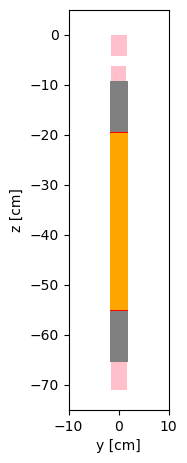

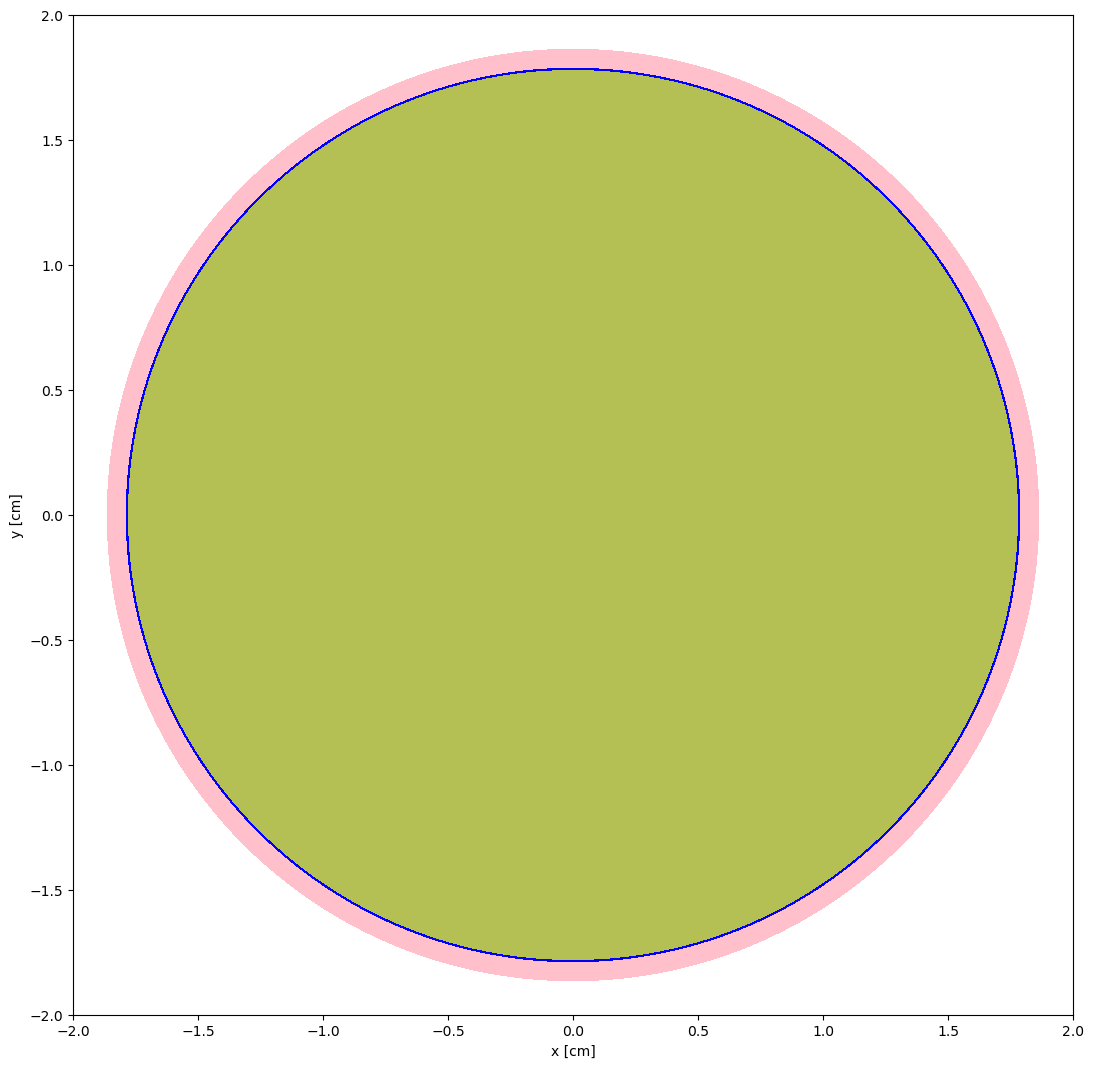

In [23]:
# Plotting fuel rod

alb_un.plot(width=(20, 80), origin=[0,0,-35], basis='yz', color_by='material', colors={aluminum:'pink', samario:'red', graphite:'gray', ual_b:'orange'})
alb_un.plot(width=(4, 4), origin=[0,0,-35], basis='xy', color_by='material', colors={aluminum:'pink', samario:'red', graphite:'gray', ar:'blue'},  pixels=[1000,1000])

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

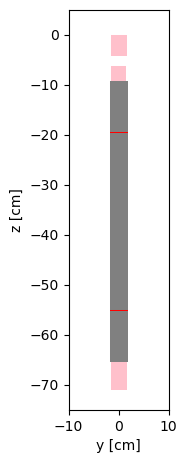

In [15]:
# Elemento Grafita
graf_un.plot(width=(20, 80), origin=[0,0,-35], basis='yz', color_by='material', colors={aluminum:'pink', samario:'red', graphite:'gray'})
#graf_un.plot(width=(4, 4), origin=[0,0,-35], basis='xy', color_by='material', colors={aluminum:'pink', samario:'red', graphite:'gray', ar:'blue'})

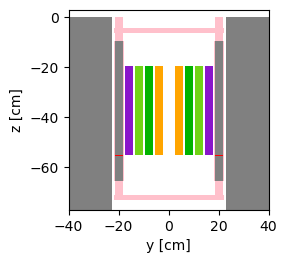

In [17]:

# do exemplo de reator tripo triga na documentação openmc (!!)



# Geometry definitions for the reactor

reactor_wall = openmc.ZCylinder(r=50.0, boundary_type='vacuum')
reactor_top = openmc.ZPlane(z0=0.0, boundary_type='vacuum')
reactor_bottom = openmc.ZPlane(z0=-114.3, boundary_type='vacuum')
reactor = openmc.Cell()
reactor.region = -reactor_wall & -reactor_top & +reactor_bottom
reactor.fill = reator_un
reactor_universe = openmc.Universe(cells=[reactor])

reactor_universe.plot(width=(80, 80), origin=[0,0,-37], 
                   basis='yz', color_by='material',
                   colors={water:'blue',ual_b:'orange',
                   graphite:'gray',
                   b4c:'yellow', samario:'red', aluminum:'pink'})

geometry = openmc.Geometry(reactor_universe)
geometry.export_to_xml()





# OpenMC simulation parameters

batches = 100
inactive = 10
particles = 5000

settings_file = openmc.Settings()
settings_file.batches = batches
settings_file.inactive = inactive
settings_file.particles = particles

bounds = [-28.527375, -28.527375, -28.527375, 28.527375, 28.527375, 28.527375]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)
settings_file.source = openmc.Source(space=uniform_dist)

settings_file.export_to_xml()

